# Todo

- Watch recursion video and take notes
- Rewatch dynamic programming video and take notes
- Rewatch graph video and take notes
- Link between index and common sections
- Big O Notation
- Divide-and-conquer
- Greedy algorithms
- Heaps
- AVL trees
- Dijkstra's Shortest path

# Index <a class="anchor" id="top"></a>
- [Deque](#deque)
    - [Stack](#deque-stack)
    - [Queue](#deque-queue)
- [Hash Tables](#hash-tables)
    - [Dictionaries (Hash Maps)](#hash-maps)
    - [Sets (Hash Sets)](#hash-sets)
    - [Complexity](#hash-tables-complexity)
- [Sort](#sort)
    - [Numbers](#sort-numbers)
    - [Custom](#sort-custom)
- [Prefix Trees (trie)](#prefix-trees)
    - [Construct](#prefix-trees-construct)
    - [Complexity](#prefix-trees-construct)
- [Binary Trees](#binary-trees)
    - [Traversals Overview](#binary-tree-traversals)
    - [DFS Iterative (preorder only)](#binary-trees-dfs-iterative)
    - [DFS Recursive (preorder, inorder, and postorder)](#binary-trees-dfs-recursive)
    - [BFS Iterative (level order)](#binary-trees-bfs-iterative)
    - [Binary Search a List](#binary-search-a-list)
- [Recursion](#recursion)
- [Backtracking](#backtracking)
    - [Template](#backtracking-template)
- [Dynamic Programming](#dynamic-programming)
- [Graphs](#graphs)
    - [Directed](#directed-graphs)
        - [DFS with Stack](#directed-graphs-dfs)
        - [BFS with Queue](#directed-graphs-bfs)
    - [Undirected](#undirected-graphs)
        - [Build Graph](#undirected-graphs-build-graph)

## Common Problems <a class="anchor" id="top-common"></a>
- [Binary Trees](#common-binary-trees)
    - [Max Root To Leaf Path Sum](#common-binary-tree-max-root-to-leaf-path-sum)
    - [Max Path Sum](#common-binary-tree-max-path-sum)
- [Recursion](#common-recursion)
    - [Reverse String](#common-reverse-string)
    - [Palindrome](#common-palindrome)
    - [Decimal to Binary](#common-decimal-to-binary)
- [Backtracking](#common-backtracking)
    - [N-Queens](#common-n-queens)
    - [Sudoku](#common-sudoku)
- [Graphs](#common-graphs)
    - [Has Path](#common-has-path)
    - [Connected Component Count](#common-connected-component-count)
    - [Max Component](#common-max-component)
    - [Shortest Path (BFS)](#common-shortest-path)
    - [Island Count](#common-island-count)
    - [Topological Sort](#common-topological-sort)

# Deque [**^^^**](#top) <a class="anchor" id="deque"></a>¶

In [1]:
from collections import deque # Pronounced "deck", means "double-ended queue"

### Stack [**^^^**](#top) <a class="anchor" id="deque-stack"></a>¶

In [2]:
stack = deque()
stack.appendleft('a') # push()
stack.popleft()       # pop()

'a'

### Queue [**^^^**](#top) <a class="anchor" id="deque-queue"></a>

In [3]:
queue = deque()
queue.append('b') # enqueue()
queue.popleft()   # dequeue()

'b'

# Hash Tables [**^^^**](#top) <a class="anchor" id="hash-tables"></a>¶

### Dictionaries (Hash Maps) [**^^^**](#top) <a class="anchor" id="hash-maps"></a>¶

In [4]:
a = {}
a['key'] = 'value'
del a['key']

### Sets (Hash Sets) [**^^^**](#top) <a class="anchor" id="hash-sets"></a>¶

In [5]:
a = set()
a.add('item')
a.remove('item')
a.discard('another')

### Complexity [**^^^**](#top) <a class="anchor" id="hash-tables-complexity"></a>¶

 - Ideally, O(1) insertion, O(1) lookup. However, collisions!
 - Buckets are linked lists (separate chaining) -> O(1) insertion, O(n) lookup
 - Buckets are balanced binary search trees (AVL trees) -> O(log n) insertion, O(log n) lookup
 - Python dictionaries -> Avg(1) and O(n) for insertion, lookup, and deletion

# Sort [**^^^**](#top) <a class="anchor" id="sort"></a>¶

**O(nlogn)**

### Numbers [**^^^**](#top) <a class="anchor" id="sort-numbers"></a>¶

In [6]:
a = [-1, 0, -1, 4, 2]
a.sort()
a.sort(reverse=True)

### Custom [**^^^**](#top) <a class="anchor" id="sort-custom"></a>¶

In [7]:
def lengthKey(str):
  return len(str)

b = ["London", "Paris", "Copenhagen", "Melbourne"]
b.sort(key=lengthKey)
print(b)

['Paris', 'London', 'Melbourne', 'Copenhagen']


# Prefix Trees (tries) [**^^^**](#top) <a class="anchor" id="prefix-trees"></a>

### Construct [**^^^**](#top) <a class="anchor" id="prefix-trees-construct"></a>¶

In [8]:
class Solution:
    def findWords(self, words):        
        trie = {}
        for word in words:
            node = trie
            for letter in word:
                # retrieve the next node; If not found, create a empty node.
                node = node.setdefault(letter, {})
            # mark the existence of a word in trie node
            node['$'] = word

### Complexity [**^^^**](#top) <a class="anchor" id="prefix-trees-complexity"></a>¶

Big O: For N words and M max length string
 - Search/Insert:
     - O(M) time
     - O(1) memory
 - Construct:
     - O(N * L) time (L is average word length)
     - O(Alphabet size * M * N) memory

# Binary Trees [**^^^**](#top) <a class="anchor" id="binary-trees"></a>

**Criteria:** At most 2 children per node, exactly 1 root, and exactly 1 path between root and any node

In [9]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.left = left
        self.right = right
        self.val = val

In [10]:
a, b, c, d, e, f = Node('A'), Node('B'), Node('C'), Node('D'), Node('E'), Node('F')
a.left, a.right, b.left, b.right, c.right = b, c, d, e, f

### Traversals Overview [**^^^**](#top) <a class="anchor" id="binary-tree-traversals"></a>

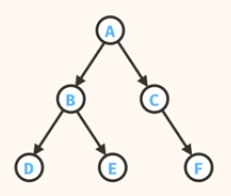

- **DFS Preorder** (root, left, right): A, B, D, E, C, F
- **DFS Inorder** (left, root, right): D, B, E, A, C, F
- **DFS Postorder** (left, right, root): D, E, B, F, C, A
- **BFS Level-order**: A, B, C, D, E, F

### **DFS Iterative** (preorder only) [**^^^**](#top) <a class="anchor" id="binary-trees-dfs-iterative"></a>

In [11]:
from collections import deque
def IterativeBinaryTreePreOrderDFS(root):
    stack = deque()
    stack.append(root)
    res = []
    while len(stack) > 0:
        current = stack.pop()
        res.append(current.val)
        if current.right: stack.append(current.right)
        if current.left: stack.append(current.left)
    return res

In [12]:
print('Preorder:', ' '.join(IterativeBinaryTreePreOrderDFS(a)))

Preorder: A B D E C F


### **DFS Recursive** (preorder, inorder, and postorder) [**^^^**](#top) <a class="anchor" id="binary-trees-dfs-recursive"></a>

In [13]:
def RecursiveBinaryTreeDFS(root, order='preorder'):
    if root is None: return []
    left = RecursiveBinaryTreeDFS(root.left, order)
    right = RecursiveBinaryTreeDFS(root.right, order)
    if order == 'preorder': return [root.val] + left + right
    if order == 'inorder': return left + [root.val] + right
    if order == 'postorder': return left + right + [root.val]

In [14]:
print('Preorder:', ' '.join(RecursiveBinaryTreeDFS(a, order='preorder')))
print('Inorder:', ' '.join(RecursiveBinaryTreeDFS(a, order='inorder')))
print('Postorder:', ' '.join(RecursiveBinaryTreeDFS(a, order='postorder')))

Preorder: A B D E C F
Inorder: D B E A C F
Postorder: D E B F C A


### **BFS Iterative** (level order) [**^^^**](#top) <a class="anchor" id="binary-trees-bfs-iterative"></a>

In [15]:
from collections import deque
def breadthFirstPrint(root):
    queue = deque()
    queue.append(root)
    res = []
    while len(queue) > 0:
        current = queue.pop()
        res.append(current.val)
        if current.left: queue.appendleft(current.left)
        if current.right: queue.appendleft(current.right)
    return res

In [16]:
print('Iterative Preorder:', ' '.join(breadthFirstPrint(a)))

Iterative Preorder: A B C D E F


### Binary Search a List [**^^^**](#top) <a class="anchor" id="binary-search-a-list"></a>¶

In [17]:
l = [1, 3, 5, 9, 11, 17, 22, 24, 31, 47, 55]

In [18]:
def find_index(target):
    left, right = 0, len(l)
    while left < right:
        middle = (left + right) // 2
        if l[middle] == target:
            return middle
        elif target < l[middle]:
            right = middle
        else:
            left = middle + 1
    return -1

In [19]:
find_index(5)

2

# Recursion [**^^^**](#top) <a class="anchor" id="recursion"></a>

# Backtracking [**^^^**](#top) <a class="anchor" id="backtracking"></a>

### **Template** [**^^^**](#top) <a class="anchor" id="backtracking-template"></a>

In [20]:
def is_solution(state):
    # check if the state is a valid solution
    return True

def get_candidates(state):
    return []

def search(state, solutions):
    if is_solution(state):
        solutions.append(state.copy())
        # return
    
    for candidate in get_candidates(state):
        state.add(candidate)
        search(state, solutions)
        state.remove(candidate)

def solve():
    solutions = []
    state = set()
    search(state, solutions)
    return solutions

# Dynamic Programming [**^^^**](#top) <a class="anchor" id="dynamic-programming"></a>

# Graphs [**^^^**](#top) <a class="anchor" id="graphs"></a>

## **Directed Graphs** [**^^^**](#top) <a class="anchor" id="directed-graphs"></a>

### DFS with Stack [**^^^**](#top) <a class="anchor" id="directed-graphs-dfs"></a>

In [21]:
graph = {
    'a': ['c', 'b'],
    'b': ['d'],
    'c': ['e'],
    'd': ['f'],
    'e': [],
    'f': []
}

In [22]:
from collections import deque
def depthFirstPrint(graph, source):
    stack = deque(source)
    visited = set()
    visited.add(source)
    result = []
    while len(stack) > 0:
        current = stack.pop()
        result.append(current)
        for neighbor in graph[current]:
            if not neighbor in visited:
                visited.add(neighbor)
                stack.append(neighbor)
    return result

In [23]:
depthFirstPrint(graph, 'a')

['a', 'b', 'd', 'f', 'c', 'e']

### BFS with Queue [**^^^**](#top) <a class="anchor" id="directed-graphs-bfs"></a>

In [24]:
graph = {
    'a': ['c', 'b'],
    'b': ['d'],
    'c': ['e'],
    'd': ['f'],
    'e': [],
    'f': []
}

In [25]:
from collections import deque
def breadthFirstPrint(graph, source):
    queue = deque(source)
    visited = set()
    visited.add(source)
    result = []
    while len(queue) > 0:
        current = queue.pop()
        result.append(current)
        for neighbor in graph[current]:
            if not neighbor in visited:
                visited.add(neighbor)
                queue.appendleft(neighbor)
    return result

In [26]:
breadthFirstPrint(graph, 'a')

['a', 'c', 'b', 'e', 'd', 'f']

## **Undirected Graphs** [**^^^**](#top) <a class="anchor" id="undirected-graphs"></a>

### Build Graph [**^^^**](#top) <a class="anchor" id="undirected-graphs-build-graph"></a>

In [27]:
edges = [
    ['i', 'j'],
    ['k', 'i'],
    ['m', 'k'],
    ['k', 'l'],
    ['o', 'n']
]

In [28]:
def buildGraph(edges):
    graph = {}
    for edge in edges:
        [a, b] = edge
        if not a in graph:
            graph[a] = []
        if not b in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)
    return graph

In [29]:
graph = buildGraph(edges)

# Common Problems [**^^^**](#top-common)

# Binary Trees [**^^^**](#top-common) <a class="anchor" id="common-binary-trees"></a>

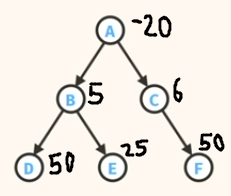

In [30]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.left = left
        self.right = right
        self.val = val

In [31]:
an, bn, cn, dn, en, fn = Node(-20), Node(5), Node(6), Node(50), Node(25), Node(50)
an.left, an.right, bn.left, bn.right, cn.right = bn, cn, dn, en, fn

### Max Root to Leaf Path Sum [**^^^**](#top-common) <a class="anchor" id="common-binary-tree-max-root-to-leaf-path-sum"></a>

- Recursive DFS
- Base case: No children -> return 0
- Decision: Current value + max(left value, right value)

In [32]:
def maxRootToLeafPathSumOfBinaryTree(root):
    left_max = maxRootToLeafPathSumOfBinaryTree(root.left) if root.left else 0
    right_max = maxRootToLeafPathSumOfBinaryTree(root.right) if root.right else 0
    return root.val + max(left_max, right_max)

In [33]:
maxRootToLeafPathSumOfBinaryTree(an)

36

### Max Path Sum [**^^^**](#top-common) <a class="anchor" id="common-binary-tree-max-path-sum"></a>

- Recursive DFS
- Track both "line max" and "global max"
- Base case: No children -> return 0 for line max and 0 for global max
- Line max decision: max(left_line_max + root, right_line_max + root, root)
- Global max decision: max(left_global_max, right_global_max, left_line_max + right_line_max + root) 

In [34]:
def maxPathSumOfBinaryTree(root):
    left_max, left_global_max = 0, 0
    right_max, right_global_max = 0, 0 
    if root.left:
        left_max, left_global_max = maxPathSumOfBinaryTree(root.left)
    if root.right:
        right_max, right_global_max = maxPathSumOfBinaryTree(root.right)
    line_max = max(left_max + root.val, right_max + root.val, root.val)
    global_max = max(left_global_max, right_global_max, left_max + right_max + root.val)
    return line_max, global_max

In [35]:
line_max, global_max = maxPathSumOfBinaryTree(an)
max(line_max, global_max)

91

# Recursion [**^^^**](#top-common) <a class="anchor" id="common-recursion"></a>

### Reverse String [**^^^**](#top-common) <a class="anchor" id="common-reverse-string"></a>

In [36]:
def reverseString(s):
    if s == "":
        return ""
    return reverseString(s[1:]) + s[0]

In [37]:
reverseString("Please Reverse Me")

'eM esreveR esaelP'

### Palindrome [**^^^**](#top-common) <a class="anchor" id="common-palindrome"></a>

In [38]:
def palindrome(s):
    if len(s) <= 1:
        return True
    if s[0] == s[len(s)-1]:
        return palindrome(s[1:len(s)-1])
    return False

In [39]:
palindrome("racecar")

True

### Decimal to Binary [**^^^**](#top-common) <a class="anchor" id="common-decimal-to-binary"></a>

- Recursively floor divide by 2
- Base case: number is 0 -> return ""
- Prepend remainder to result at each step

In [40]:
def decimalToBinary(decimal, result=""):
    if decimal == 0:
        return result
    result = str(decimal % 2) + result
    return decimalToBinary(decimal // 2, result)

In [41]:
decimalToBinary(4)

'100'

# Backtracking [**^^^**](#top-common) <a class="anchor" id="common-backtracking"></a>

### N-Queens [**^^^**](#top-common) <a class="anchor" id="common-n-queens"></a>

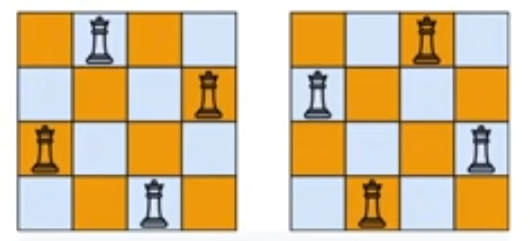

We represent the state as a 1D array.
- Index of element in list -> row
- Value of element in list -> column
- Left example: [1, 3, 0, 2]
- Right example: [2, 0, 3, 1]

In [42]:
def is_solution(state, n):
    return len(state) == n

def get_candidates(state, n):
    position = len(state)
    candidates = set(range(n))
    for row, col in enumerate(state):
        candidates.discard(col)
        dist = position - row
        candidates.discard(col + dist)
        candidates.discard(col - dist)
    return candidates

def search(state, solutions, n):
    if is_solution(state, n):
        solutions.append(state.copy())
    
    for candidate in get_candidates(state, n):
        state.append(candidate)
        search(state, solutions, n)
        state.pop()

def solve(n):
    solutions = []
    state = []
    search(state, solutions, n)
    return solutions

In [43]:
solve(4)

[[1, 3, 0, 2], [2, 0, 3, 1]]

### Sudoku [**^^^**](#top-common) <a class="anchor" id="common-sudoku"></a>

1. Each of 1-9 occurs exactly once in each row
2. Each of 1-9 occurs exactly once in each column
3. Each of 1-9 occurs exactly once in each 3x3

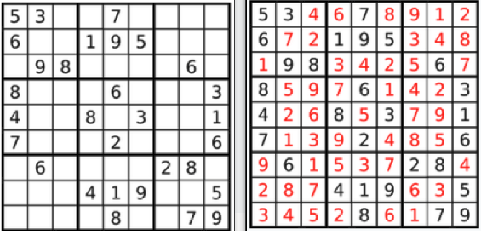

Input: [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]

Output: [["5","3","4","6","7","8","9","1","2"],["6","7","2","1","9","5","3","4","8"],["1","9","8","3","4","2","5","6","7"],["8","5","9","7","6","1","4","2","3"],["4","2","6","8","5","3","7","9","1"],["7","1","3","9","2","4","8","5","6"],["9","6","1","5","3","7","2","8","4"],["2","8","7","4","1","9","6","3","5"],["3","4","5","2","8","6","1","7","9"]]

In [44]:
DIGITS = set([str(num) for num in range(1, 10)])

def is_solution(state):
    for row in get_rows(state):
        if not set(row) == DIGITS: return False
    for col in get_cols(state):
        if not set(col) == DIGITS: return False
    for grid in get_grids(state):
        if not set(col) == DIGITS: return False
    return True

def get_candidates(state, row, col):
    digits = DIGITS.copy()
    remove_row(digits, row)
    remove_col(digits, col)
    remove_grid(digits, row, col)
    return digits

def search(state):
    if is_solution(state):
        return True
    
    for i, row in enumerate(state):
        for j, element in enumerate(row):
            if element == '.':
                for candidate in get_candidates(state, i, j):
                    state[i][j] = candidate
                    if search(state): return True
                    state[i][j] = '.'
                return False
    return True

# Graphs [**^^^**](#top-common) <a class="anchor" id="common-graphs"></a>

### Has Path [**^^^**](#top-common) <a class="anchor" id="common-has-path"></a>

In [45]:
edges = [
    ['i', 'j'],
    ['k', 'i'],
    ['m', 'k'],
    ['k', 'l'],
    ['o', 'n']
]

In [46]:
def buildGraph(edges):
    graph = {}
    for edge in edges:
        [a, b] = edge
        if not a in graph:
            graph[a] = []
        if not b in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)
    return graph

In [47]:
g = buildGraph(edges)

In [48]:
def hasPath(graph, src, dst, visited = set()):
    if src == dst:
        return True
    if src in visited:
        return False
    visited.add(src)
    for neighbor in graph[src]:
        if hasPath(graph, neighbor, dst, visited):
            return True
    return False

In [49]:
hasPath(g, 'j', 'm')

True

### Connected Component Count [**^^^**](#top-common) <a class="anchor" id="common-connected-component-count"></a>

In [50]:
def connectedComponentCount(graph):
    visited = set()
    count = 0
    for node in graph:
        if explore(graph, node, visited):
            count += 1
    return count

def explore(graph, current, visited):
    if current in visited:
        return False
    visited.add(current)
    for neighbor in graph[current]:
        explore(graph, neighbor, visited)
    return True

In [51]:
gc = {
    0: [8, 1, 5],
    1: [0],
    5: [0, 8],
    8: [0, 5],
    2: [3, 4],
    3: [2, 4],
    4: [3, 2]
}

In [52]:
connectedComponentCount(gc)

2

### Max Component [**^^^**](#top-common) <a class="anchor" id="common-max-component"></a>

In [53]:
def maxComponentCount(graph):
    visited = set()
    maximum = 0
    for node in graph:
        e = explore(graph, node, visited)
        maximum = max(maximum, e)
    return maximum

def explore(graph, current, visited):
    if current in visited:
        return 0
    visited.add(current)
    size = 1
    for neighbor in graph[current]:
        size += explore(graph, neighbor, visited)
    return size

In [54]:
gc = {
    0: [8, 1, 5],
    1: [0],
    5: [0, 8],
    8: [0, 5],
    2: [3, 4],
    3: [2, 4],
    4: [3, 2]
}

In [55]:
maxComponentCount(gc)

4

### Shortest Path (BFS) [**^^^**](#top-common) <a class="anchor" id="common-shortest-path"></a>

In [56]:
se = [
    ['w', 'x'],
    ['x', 'y'],
    ['z', 'y'],
    ['z', 'v'],
    ['w', 'v']
]

In [57]:
def buildGraph(edges):
    graph = {}
    for edge in edges:
        [a, b] = edge
        if not a in graph:
            graph[a] = []
        if not b in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)
    return graph

In [58]:
sg = buildGraph(se)

In [59]:
from collections import deque
def shortestPath(graph, source, destination):
    queue = deque([(source, 0)])
    visited = set()
    visited.add(source)
    while len(queue) > 0:
        [current, distance] = queue.pop()
        if current == destination:
            return distance
        for neighbor in graph[current]:
            if not neighbor in visited:
                visited.add(neighbor)
                queue.appendleft([neighbor, distance + 1])
    return -1

In [60]:
shortestPath(sg, 'w', 'z')

2

### Island Count [**^^^**](#top-common) <a class="anchor" id="common-island-count"></a>

In [61]:
grid = [
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'L', 'W', 'W', 'W'],
    ['W', 'W', 'W', 'L', 'W'],
    ['W', 'W', 'L', 'L', 'W'],
    ['L', 'W', 'W', 'L', 'L'],
    ['L', 'L', 'W', 'W', 'W'],
]

In [62]:
def islandCount(grid):
    visited = set()
    count = 0
    for r in range(0, len(grid)):
        for c in range(0, len(grid[0])):
            if explore(grid, r, c, visited):
                count += 1
    return count

def explore(grid, r, c, visited):
    rowInBounds = 0 <= r and r < len(grid)
    colInBounds = 0 <= c and c < len(grid[0])
    if not rowInBounds or not colInBounds:
        return False
    if grid[r][c] == 'W':
        return False
    pos = str(r) + ',' + str(c)
    if pos in visited:
        return False
    visited.add(pos)
    explore(grid, r-1, c, visited)
    explore(grid, r+1, c, visited)
    explore(grid, r, c-1, visited)
    explore(grid, r, c+1, visited)
    return True

In [63]:
islandCount(grid)

3

### Topological Sort [**^^^**](#top-common) <a class="anchor" id="common-topological-sort"></a>

    1. Initialize a queue, Q to keep a track of all the nodes in the graph with 0 in-degree.
    2. Iterate over all the edges in the input and create an adjacency list and also a map of node v/s in-degree.
    3. Add all the nodes with 0 in-degree to Q.
    4. The following steps are to be done until the Q becomes empty.
        a. Pop a node from the Q. Let's call this node, N.
        b. For all the neighbors of this node, N, reduce their in-degree by 1. If any of the nodes' in-degree reaches 0, add it to the Q.
        c. Add the node N to the list maintaining topologically sorted order.
        Continue from step 4.1.